# Determining the BEST NBA player in the 2023-2024 Season

In [ ]:
# Web Scraping data from an api on the nba site 
import requests
import json
import pandas as pd

url = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2023-24&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

headers = {
  'Accept': '*/*',
  'Accept-Language': 'en-GB,en;q=0.9,zh-CN;q=0.8,zh;q=0.7',
  'Connection': 'keep-alive',
  'Origin': 'https://www.nba.com',
  'Referer': 'https://www.nba.com/',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-site',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
  'sec-ch-ua': '"Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'Cookie': 'ak_bmsc=C03FD1C55B949C6DB632ED80C26C3F92~000000000000000000000000000000~YAAQBPEoF/FQKzaOAQAAqwQnQBcO7fo6/W0CPz6WVqQ1HRZoT5ZIABQOF6EM14LMCvPjwMFA+wmzm5wRxC46wk9idjsva3DuLGalQTdjDMeSNXPE9UFhQsoglbnMQlH82UpR7Xc8xeKdwDbCBoVIagkNqwwtcg/7TjUNLHH2Zk2U2aAoDbO98F15FITCd4+N+pFNfPrb6J3b3u6eWahrPW+x43KKZerffNmjzHWRPpKqesgjn72lIaefRjCsQLOpgZm32u6uTxcggvFmOt4vzUVjBVPZL+y6Q1JPzTQMza1wSZKv82KtPuMULRP75v8oSrTux3LUnKLcVXE4Ek5RnznxLlvFcPnoY/qeqOlg7yhm7EqqiAgC4H8='
}

response = requests.get(url, headers=headers)

playerdata = response.json()

playerdata.keys()

headers = playerdata['resultSets'][0]['headers']
rowSet = playerdata['resultSets'][0]['rowSet']

df = pd.DataFrame(rowSet, columns=headers)

#print(df.head()) # checking whether data was formatted properly

df.to_csv('nba_playerdata.csv', index=False) # index=False to remove pandas index

In [1]:
# Sorting Data 
import pandas as pd

df = pd.read_csv('nba_playerdata.csv') 

# Creating Points Per Game Column
df['PPG'] = df['PTS'] / df['GP']

In [40]:
columns_of_interest = ['FG_PCT', 'PPG', 'REB', 'AST', 'STL', 'BLK']

# Analysing general trend of player stats 
stats = df[columns_of_interest].describe()

# Stats we're using 
rows = stats.loc[['mean', '50%', 'std']]

print(rows)

        FG_PCT       PPG         REB         AST        STL        BLK
mean  0.444313  8.276397  154.687050   94.685252  26.282374  18.393885
50%   0.450000  6.049194  115.000000   53.500000  21.000000  11.000000
std   0.133321  6.987601  154.942172  112.033665  23.747496  24.442716


In [2]:
mean_FG_PCT = df['FG_PCT'].mean()
print(mean_FG_PCT)

0.4443129496402878


## Using Seaborn to determine how much each statistic varies 

In [51]:
import seaborn as sns
nba_player = pd.read_csv('nba_playerdata.csv')

<Axes: xlabel='None', ylabel='FG_PCT'>

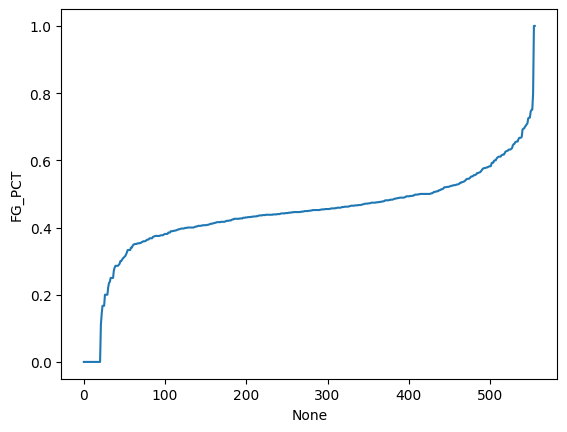

In [70]:
# field goal percentage variation
FG_PCT_sorted = nba_player.sort_values(by='FG_PCT', ascending=True)
FG_PCT_sorted = FG_PCT_sorted.reset_index(drop=True)

sns.lineplot(x = FG_PCT_sorted.index, y = "FG_PCT", data=FG_PCT_sorted)

<Axes: xlabel='None', ylabel='PPG'>

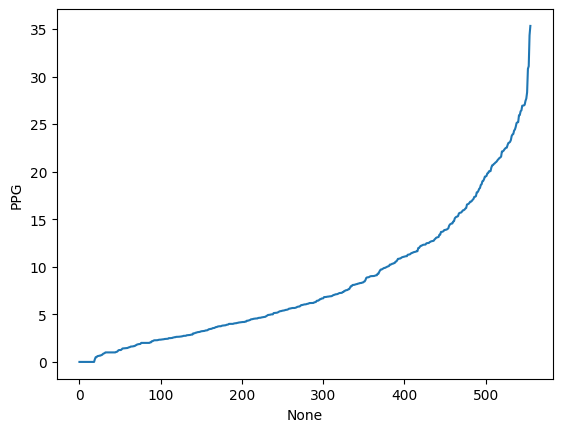

In [71]:
# Points Per Game Variation 
nba_player['PPG'] = nba_player['PTS'] / nba_player['GP']

PPG_sorted = nba_player.sort_values(by='PPG', ascending=True)
PPG_sorted = PPG_sorted.reset_index(drop=True)

sns.lineplot(x = PPG_sorted.index , y = "PPG", data=PPG_sorted)

<Axes: xlabel='None', ylabel='REB'>

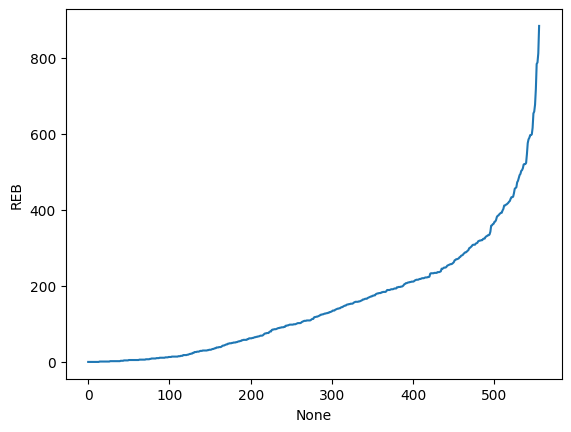

In [72]:
# Rebound variation 
REB_sorted = nba_player.sort_values(by='REB', ascending=True)
REB_sorted = REB_sorted.reset_index(drop=True)

sns.lineplot(x = REB_sorted.index , y = "REB", data=REB_sorted)

<Axes: xlabel='None', ylabel='AST'>

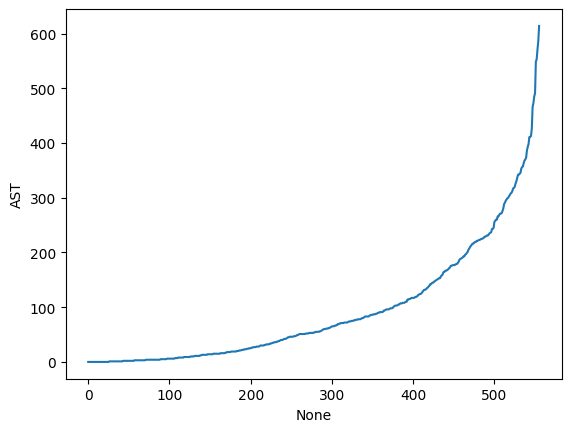

In [73]:
# Assists Variation 
AST_sorted = nba_player.sort_values(by='AST', ascending=True)
AST_sorted = AST_sorted.reset_index(drop=True)

sns.lineplot(x = AST_sorted.index , y = "AST", data=AST_sorted)

<Axes: xlabel='None', ylabel='STL'>

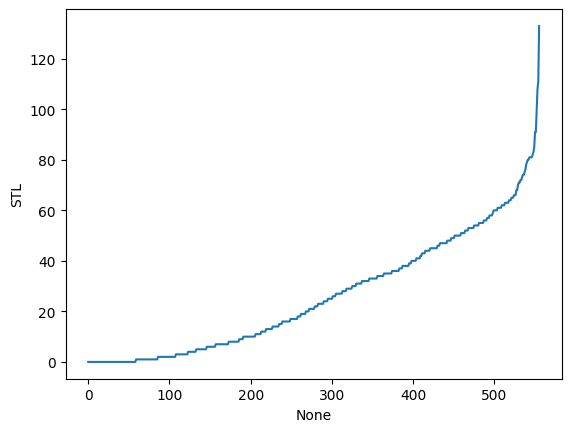

In [74]:
# Steals Variation
STL_sorted = nba_player.sort_values(by='STL', ascending=True)
STL_sorted = STL_sorted.reset_index(drop=True)

sns.lineplot(x = STL_sorted.index , y = "STL", data=STL_sorted)

<Axes: xlabel='None', ylabel='BLK'>

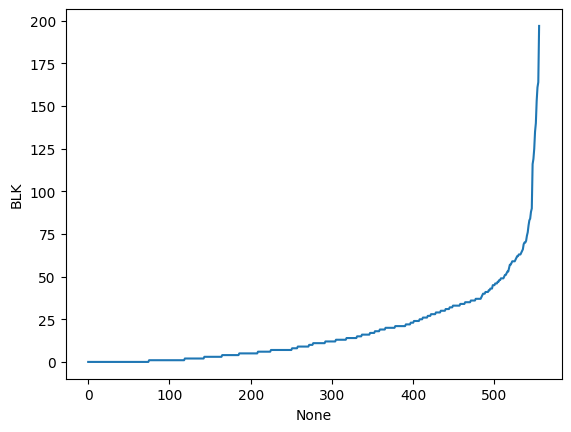

In [75]:
# Blocks Variation
BLK_sorted = nba_player.sort_values(by='BLK', ascending=True)
BLK_sorted = BLK_sorted.reset_index(drop=True)

sns.lineplot(x = BLK_sorted.index , y = "BLK", data=BLK_sorted)

##### By Observing the above graphs, there is an exponential pattern for all graphs except the field goal percentage graph. This shows the quality of players is disproportional to the statistics where the relationship is non-linear. 
##### The extreme ends of the graphs would be due to players specialised in one skillset such as assisting
##### Thus, to determine the best player, we would need to find the player with the most well-rounded skillset

### Collating names of Top 10 players from each category

In [13]:
df_sorted = df.sort_values('FG_PCT', ascending=False)

# storing top 10 names into a list 
FG_PCT = df_sorted['PLAYER_NAME'].head(10).tolist()

print("Top 10 players for field goal percentages:", FG_PCT)

Top 10 players for field goal percentages: ['Drew Peterson', 'Adama Sanogo', 'Mamadi Diakite', 'Dereck Lively II', 'Micah Potter', 'Jericho Sims', 'Udoka Azubuike', 'Jermaine Samuels Jr.', 'Charles Bassey', 'Daniel Gafford']


In [28]:
df_sorted = df.sort_values(by='PPG', ascending=False)

# storing top 10 names for Points Per Game 
PPG = df_sorted['PLAYER_NAME'].head(10).tolist()

print(PPG)

['Joel Embiid', 'Luka Doncic', 'Shai Gilgeous-Alexander', 'Giannis Antetokounmpo', 'Kevin Durant', 'Donovan Mitchell', 'Devin Booker', 'Jayson Tatum', "De'Aaron Fox", 'Stephen Curry']


In [29]:
df_sorted = df.sort_values(by='REB', ascending=False)

# storing top 10 names for Rebounds
REB = df_sorted['PLAYER_NAME'].head(10).tolist()

print(REB)

['Domantas Sabonis', 'Rudy Gobert', 'Nikola Jokic', 'Anthony Davis', 'Giannis Antetokounmpo', 'Jusuf Nurkic', 'Nikola Vucevic', 'Jarrett Allen', 'Jonas Valanciunas', 'Victor Wembanyama']


In [34]:
df_sorted = df.sort_values(by='AST', ascending=False)

# storing top 10 names for Rebounds
AST = df_sorted['PLAYER_NAME'].head(10).tolist()

print(AST)

['Tyrese Haliburton', 'Nikola Jokic', 'Luka Doncic', 'Trae Young', 'Domantas Sabonis', 'James Harden', 'Tyus Jones', 'Fred VanVleet', 'LeBron James', 'Damian Lillard']


In [31]:
df_sorted = df.sort_values(by='STL', ascending=False)

# Storing top 10 names for Steals 
STL = df_sorted['PLAYER_NAME'].head(10).tolist()

print(STL)

['Shai Gilgeous-Alexander', 'Matisse Thybulle', "De'Aaron Fox", 'Kawhi Leonard', 'Paul George', 'Alex Caruso', 'Donovan Mitchell', 'Luka Doncic', 'Nikola Jokic', 'Jalen Suggs']


In [32]:
df_sorted = df.sort_values(by='BLK', ascending=False)

# Storing top 10 names for Blocks
BLK = df_sorted['PLAYER_NAME'].head(10).tolist()

print(BLK)

['Victor Wembanyama', 'Brook Lopez', 'Chet Holmgren', 'Anthony Davis', 'Walker Kessler', 'Rudy Gobert', 'Daniel Gafford', 'Nic Claxton', 'Myles Turner', 'Jaren Jackson Jr.']


### Determining the top 3 most well-rounded players 

In [35]:
star_players = FG_PCT + PPG + REB + AST + STL + BLK

# function to find which players have the most occurrences in the scoring categories 
def most_occurrences(names_list):
    name_counter = {}
    for name in names_list:
        if name in name_counter:
            name_counter[name] += 1
        else:
            name_counter[name] = 1
    # sorting the dictionary by value in descending order
    sorted_names = sorted(name_counter.items(), key=lambda x: x[1], reverse=True)
    
    top_names = sorted_names[:3] # top 3 names with most occurrences 
    return top_names

top_players = most_occurrences(star_players)

top_3 = []

for name, _ in top_players:
    top_3.append(name)

# top 3 
print(top_3)

['Luka Doncic', 'Nikola Jokic', 'Daniel Gafford']


In [46]:
luka_stats = df[df['PLAYER_NAME'] == 'Luka Doncic']
luka_stats = luka_stats[['FG_PCT', 'PPG', 'REB', 'AST', 'STL', 'BLK']]

# Storing Luka's stats into a list 
luka_stats_collated = luka_stats.values.tolist()[0]
print(luka_stats_collated)

[0.494, 34.327586206896555, 520.0, 571.0, 83.0, 33.0]


In [47]:
jokic_stats = df[df['PLAYER_NAME'] == 'Nikola Jokic']
jokic_stats = jokic_stats[['FG_PCT', 'PPG', 'REB', 'AST', 'STL', 'BLK']]

# Storing Jokic's stats into a list 
jokic_stats_collated = jokic_stats.values.tolist()[0]
print(jokic_stats_collated)

[0.582, 25.953125, 787.0, 586.0, 82.0, 59.0]


In [49]:
daniel_stats = df[df['PLAYER_NAME'] == 'Daniel Gafford']
daniel_stats = daniel_stats[['FG_PCT', 'PPG', 'REB', 'AST', 'STL', 'BLK']]

# Storing Daniel's stats into a list 
daniel_stats_collated = daniel_stats.values.tolist()[0]
print(daniel_stats_collated)

[0.71, 10.830508474576272, 459.0, 80.0, 54.0, 125.0]


In [91]:
# Putting weightage on each category 
weightage = [100, 10, 0.1, 0.1, 0.1, 0.1]

# Calculating weightage 
import numpy as np 

np_weightage = np.array(weightage)

luka_weightage = np.sum(np.array(luka_stats_collated) * np_weightage)
jokic_weightage = np.sum(np.array(jokic_stats_collated) * np_weightage)
daniel_weightage = np.sum(np.array(daniel_stats_collated) * np_weightage)

if jokic_weightage > daniel_weightage and jokic_weightage > luka_weightage:
    print("Nikola Jokic is the best player!")
elif luka_weightage > daniel_weightage:
    print("Luka Doncic is the best player!")
else:
    print("Daniel Gafford is the best player!")

Luka Doncic is the best player!
